# Setup e carregamento do Dataset

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [22]:
dataset = load_iris()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target)

# Análise Exploratória

**Verificando um possível desbalanceamento de classes**

Ao iniciar a análise de um dataset para um problema de classificação, sempre começo verificando
o balanceamento das classes. Com o Dataset Iris, todas as classes possuem a mesma quantidade de
amostras, então o desbalanceamento não será um problema.

In [23]:
y.value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

**Importância das Features**

Em seguida, tentei observar a importância das features do dataset. Para esse fim, realizei duas análises:
primeiramente, como as features numéricas do dataset se correlacionam, e, posteriormente, uma análise de relação com
as labels usando uma métrica chamada Mutual Information (MI).

A informação mútua, como a correlação, mede a relação entre duas variáveis. No entanto, diferente da correlação,
a MI pode detectar relações não lineares. Podemos definir a MI como uma métrica que avalia a "quantidade de informação"
que uma variável aleatória fornece sobre outra, sendo fortemente ligada ao conceito de entropia em teoria da informação.

Os achados sugerem que:
- As features Petal Length e Petal Width são fortes indicadores da espécie de Iris, podendo ser até usadas sozinhas para prever o Target
- A feature Sepal Width, embora possua baixo MI, também possui baixa correlação com as outras features, podendo adicionar informações que as outras features não fornecem

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

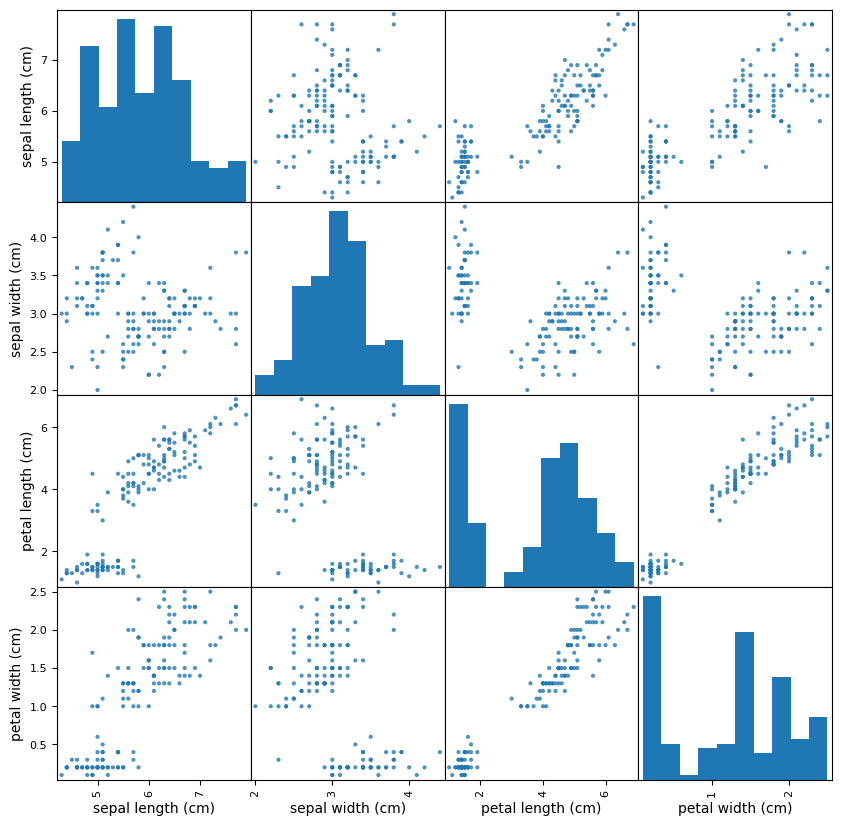

In [24]:
pd.plotting.scatter_matrix(X, figsize=(10, 10), alpha=0.8)

In [25]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, discrete_features=False)
mi = pd.DataFrame({"Feature": X.columns, "Mutual Info": mi})
mi = mi.sort_values("Mutual Info", axis=0, ascending=False)
mi.reset_index(drop=True)

,Feature,Mutual Info
0,petal width (cm),0.995139
1,petal length (cm),0.989859
2,sepal length (cm),0.498637
3,sepal width (cm),0.257182


A classe Petal Length possui um relacionamento tão forte com a label que ela, mesmo sozinha, funciona como um bom separador de classes:

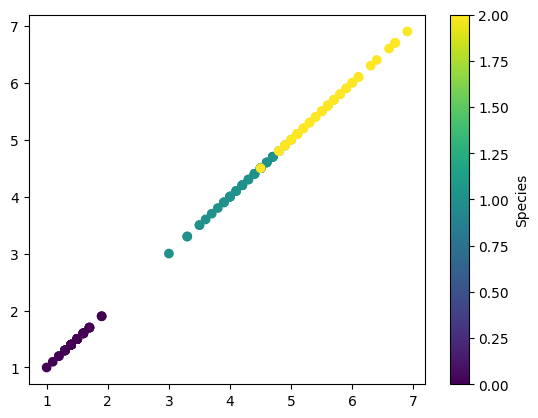

In [26]:
from matplotlib import pyplot as plt

plt.scatter(X["petal length (cm)"], X["petal length (cm)"], c=y, cmap="viridis")
plt.colorbar(label="Species")